<a href="https://colab.research.google.com/github/ChiaraAlba/Decision-Tree/blob/master/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

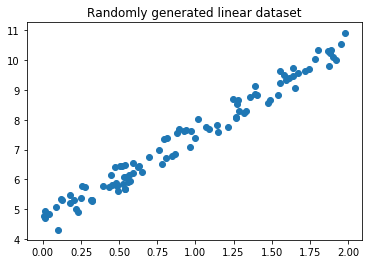

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.scatter(X,y)
plt.title('Randomly generated linear dataset')
plt.show()

# Normal Equation
## Closed-form solution
This equation allows us to find the value of theta minimising the MSE (mean square error) given a linear regression hypothesis

$ \Theta_{opt} = (X^T \cdot  X)^{-1}  \cdot X^T \cdot y $



In [3]:
X_complete = np.c_[np.ones((100,1)), X]  # We add a column of ones (c_[] to add c) to X
theta_opt = np.linalg.inv(X_complete.T.dot(X_complete)).dot(X_complete.T).dot(y)
theta_opt

array([[4.58495657],
       [2.96652693]])

Our linear hypothesis was given by:

$ y = 4 + 3 x + Gaussian\,noise$

Therefore $\theta_1 = 4$ and $\theta_2 = 3$. Our optimal values for $\Theta$ are close enough.
With $\Theta_{opt}$ we can now make predictions.

In [0]:
X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), X_new]

y_predict = X_new.dot(theta_opt)

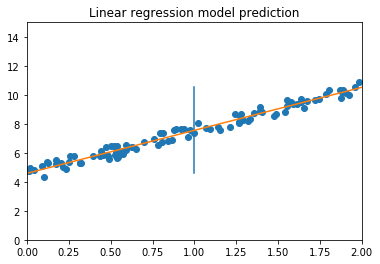

In [5]:
plt.scatter(X, y)
plt.plot(X_new, y_predict)
plt.axis([0,2,0,15])
plt.title('Linear regression model prediction')
plt.show()

###Equivalently using Scikit-Learn



In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_  # It produces separately the bias term (called intercept) and the coefficients

(array([4.58495657]), array([[2.96652693]]))

In [7]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[ 4.58495657],
       [10.51801044]])

 # Batch Gradient Descent
 
$ \Theta^{n+1} = \Theta^{n} - \eta \nabla_{\Theta}MSE(\Theta^n)$

$\eta$ is the **learning rate**

In [8]:
eta = [0.02, 0.1, 0.5]
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) 

for iteration in range(n_iterations):
  gradients = 2/m * X_complete.T.dot(X_complete.dot(theta) - y)
  theta = theta - eta[1] * gradients
  
theta

array([[4.58495657],
       [2.96652693]])

#### Gradient Descent using three different values for the learning rate

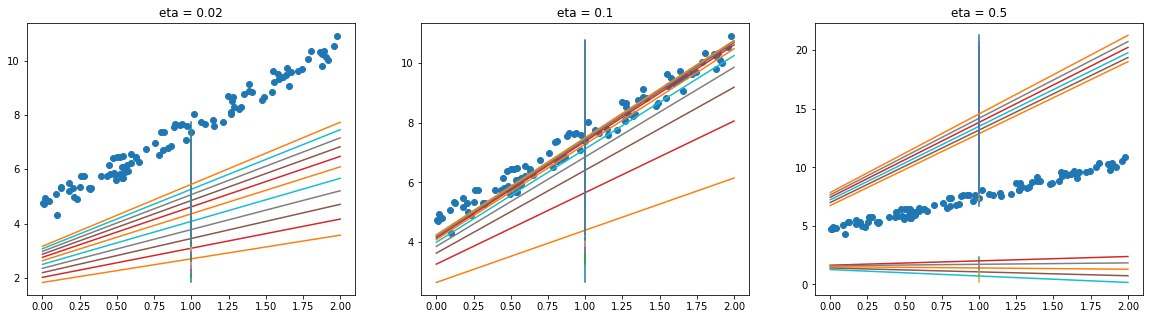

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), X_new]
theta_r = np.random.randn(2,1)

for j in range(len(eta)):
  fig = ax[j].scatter(X,y)
  theta = theta_r
  ax[j].set_title('eta = {}'.format(eta[j]))
  for iteration in range(11):
    gradients = 2/m * X_complete.T.dot(X_complete.dot(theta) - y)
    theta = theta - eta[j] * gradients
    y_predict = X_new.dot(theta)
    fig = ax[j].plot(X_new, y_predict)

# Stochastic Gradient Descent

At every step in our iterations, we pick only one randomly chosen instance and calculate the gradient only based on that single instance.

**+:** 
- the randomness is good to escape local minima with very irregular cost functions
- good for huge training sets
          
**-:** 
- The algorithm will never settle at the global minimum, but will continue to bounce around it

Tecnique called *simulated annealing*: gradually reduces the learning rate, so that at the beginning is big to jump out local minima and later it gets smaller and smaller to help settling down

In [10]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t1 + t)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_complete[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    
theta

array([[4.57786749],
       [2.97092484]])

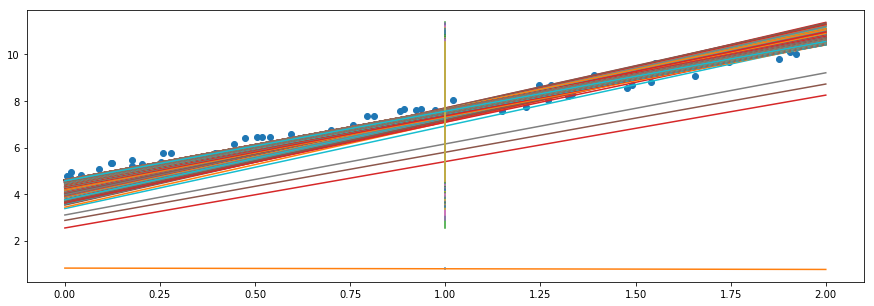

In [11]:
fig, ax = plt.subplots(figsize=(15,5))
fig = ax.scatter(X,y)

X_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2,1)), X_new]

theta = np.random.randn(2,1)

for epoch in range(11):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_complete[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    y_predict = X_new.dot(theta)
    fig = ax.plot(X_new, y_predict)

  

With Scikit-Learn

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1 )    # 50 epochs, no penalty therefore no regularization, starting eta given
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.56176179]), array([2.96602512]))

##Mini-batch Gradient Descent

At each step it computes the gradients on small random groups of instances, said *mini-batches*.



#Polynomial Regression

Useful to fit more complex data with a linear model.

The idea is to add powers of each feature as new features and train a linear model with this extended set of features.

Let's generate non-linear data:

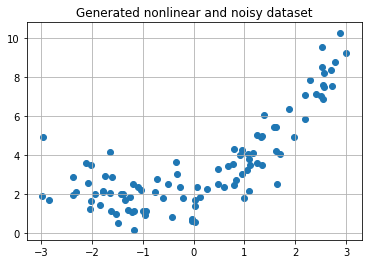

In [25]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)
plt.title('Generated nonlinear and noisy dataset')
plt.grid(True)
plt.show()

Let's start preprocessing the data, using a Scikit-Learn method. We want to take second powers (because our data is quadratic) of our features.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feat.fit_transform(X)

print(X[0],'\n', X_poly[0])

[2.29954061] 
 [2.29954061 5.28788702]


We can use these extended features to fit a LinearRegression model already imported from Scikit-Learn

In [30]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([2.0524277]), array([[0.9709709 , 0.50150171]]))

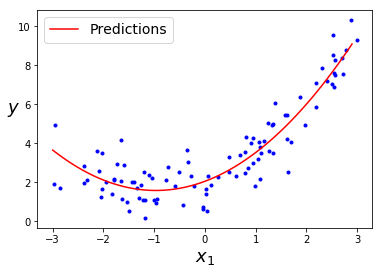

In [56]:
X_new = np.arange(-3, 3, 0.1) 
y_predict = lin_reg.coef_[0][1]  * X_new**2 + lin_reg.coef_[0][0] * X_new + lin_reg.intercept_
plt.plot(X,y, 'b.')
plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.legend(loc = 0, fontsize = 14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Now we compare a Polynomial Regression of higher order. Increasing the order, we'll be considering higher powers and therefore the normalization/scale of the features becomes fundamental. To this end, we use the **Pipeline class** from Scikit-Learn, which accomplishes all the data transformation steps in the right order.

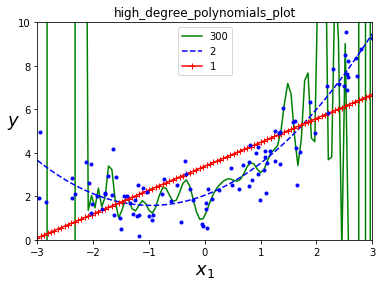

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

X_new=np.linspace(-3, 3, 100).reshape(100, 1)

for style, degree in (('g-', 300), ('b--', 2), ('r-+', 1)):
  poly_feat = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  poly_reg = Pipeline([
      ("poly_features", poly_feat),
      ('std_scaler', std_scaler),
      ('lin_reg', lin_reg)
  ])
  poly_reg.fit(X, y)
  y_new = poly_reg.predict(X_new)
  plt.plot(X_new, y_new, style, label = str(degree))
  
plt.plot(X, y, "b.")
plt.legend(loc=0)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("high_degree_polynomials_plot")

plt.show()

In [66]:
poly_feat = PolynomialFeatures(degree=300, include_bias=False)
X_poly = poly_feat.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_[0][:10]

(array([3.34781914]),
 array([-1.80509972e-132, -4.21109677e-134,  5.43910471e-134,
        -7.96477903e-134, -6.08532938e-134, -1.05411245e-134,
         2.42207057e-134,  2.27996483e-150,  1.50872255e-134,
         1.19293758e-134]))

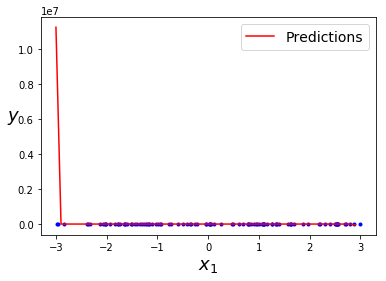

In [68]:
X_new = np.arange(-3, 3, 0.1) 
d = 300

y_predict =  lin_reg.intercept_
for n in range(d):
  y_predict = y_predict + lin_reg.coef_[0][n] * X_new**(n+1) 
  
plt.plot(X,y, 'b.')
plt.plot(X_new, y_predict, 'r-', label = 'Predictions')
plt.legend(loc = 0, fontsize = 14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)



plt.show()

In [71]:
len(lin_reg.coef_[0])

300

#Learning Curves

